# 🧠 Model Training – Student Academic Behavior & Performance
This notebook includes data cleaning, preprocessing, correlation-based feature selection, and model training to predict `exam_score` using regression models.

In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

In [2]:
# 📥 Load Dataset
df = pd.read_csv('C:/Users/rayha/OneDrive/Dokumen/1. Rayhan/3. Project/1. Personal Project/2025/2. Dummy Project/1. Students Performance/cleaned_data.csv')
df.head()

,student_id,age,gender,major,study_hours_per_day_average,social_media_hours_average,netflix_hours_average,part_time_job,attendance_percentage,sleep_hours_average,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,male,Computer Science,7.645367,0.428571,0.014286,1,70.30%,6.2,...,10.9,Co-Learning Group,1,2,9,7,3,Reading,3.0,100
1,100001,28,male,Arts,5.700000,0.071429,0.057143,0,88.40%,7.2,...,8.3,Co-Learning Group,1,0,7,2,5,Reading,6.0,99
2,100002,17,male,Arts,2.400000,0.600000,0.100000,0,82.10%,9.2,...,8.0,Library,1,2,3,9,1,Kinesthetic,7.6,98
3,100003,27,other,Psychology,3.400000,0.657143,0.328571,1,79.30%,4.2,...,11.7,Co-Learning Group,1,0,5,3,5,Reading,3.2,100
4,100004,25,female,Business,4.700000,0.114286,0.385714,1,62.90%,6.5,...,9.4,Quiet Room,1,1,9,1,5,Reading,7.1,98


In [3]:
# 🚨 Remove Outliers from Numeric Columns
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df.reset_index(drop=True)

df = remove_outliers_iqr(df)

In [4]:
# 🔢 One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [5]:
# 📊 Feature Selection using f_regression
X = df_encoded.drop(columns='exam_score')
y = df_encoded['exam_score']
f_scores, _ = f_regression(X, y)
feature_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
selected_features = feature_scores[feature_scores > 5].index.tolist()
print('Selected Features:', selected_features)

Selected Features: ['previous_gpa', 'motivation_level', 'exam_anxiety_score', 'study_hours_per_day_average', 'screen_time', 'study_environment_Dorm', 'access_to_tutoring', 'stress_level', 'study_environment_Quiet Room', 'sleep_hours_average', 'exercise_frequency_weekly', 'major_Computer Science', 'study_environment_Co-Learning Group', 'study_environment_Library', 'attendance_percentage_70.40%', 'attendance_percentage_43.50%', 'attendance_percentage_98.40%', 'attendance_percentage_52.60%', 'major_Psychology', 'attendance_percentage_42.30%', 'attendance_percentage_99.60%', 'attendance_percentage_67.60%', 'major_Biology', 'attendance_percentage_74.20%', 'attendance_percentage_95.20%', 'attendance_percentage_91.10%', 'attendance_percentage_72.50%', 'attendance_percentage_48.00%', 'attendance_percentage_74.80%', 'attendance_percentage_75.80%', 'attendance_percentage_59.10%', 'social_media_hours_average', 'attendance_percentage_87.00%']


In [6]:
# ⚙️ Data Preparation Function
def prepare_data(df, features, target='exam_score', scale=True):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [7]:
# 🤖 Train & Evaluate Models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n🔷 Model: {name}")
        print("R² Score:", r2_score(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))

In [8]:
# 🧪 Apply Regression Models to Predict exam_score
X_train, X_test, y_train, y_test = prepare_data(df_encoded, selected_features)

regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

train_and_evaluate(regression_models, X_train, X_test, y_train, y_test)


🔷 Model: Linear Regression
R² Score: 0.86074524804459
MSE: 17.24775687011122

🔷 Model: Random Forest Regressor
R² Score: 0.8562125137695842
MSE: 17.809170377616905


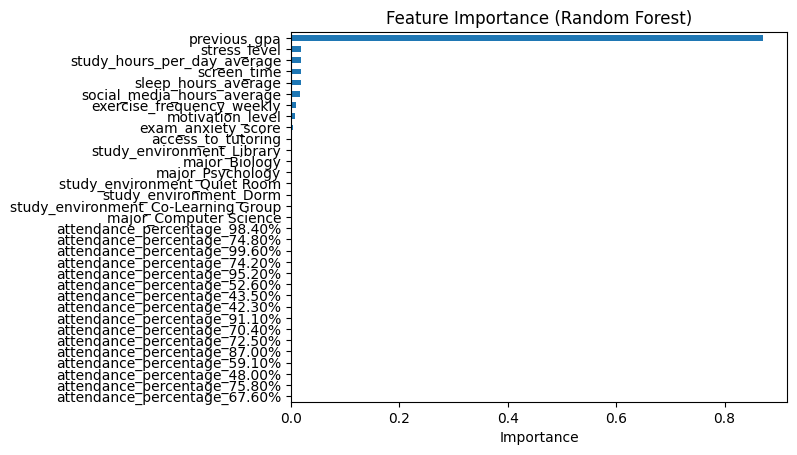

In [9]:
# 📈 Feature Importance Plot (Random Forest)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=selected_features).sort_values()
feat_imp.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

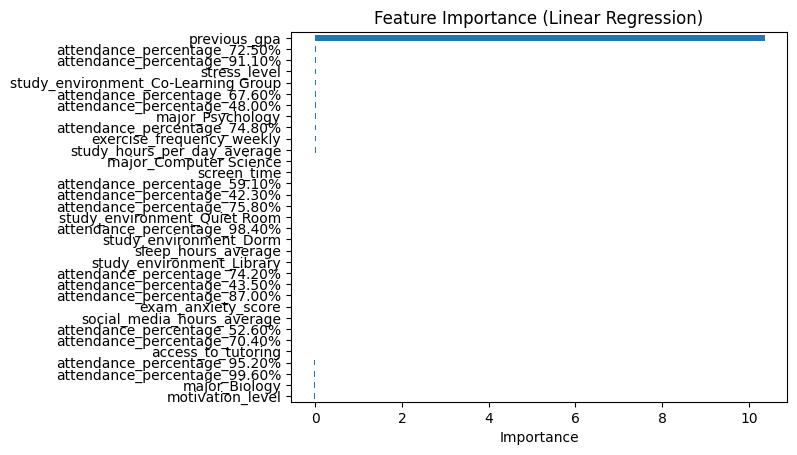

In [11]:
# 📈 Feature Importance Plot (Linear Regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
importances1 = lr.coef_
feat_imp = pd.Series(importances1, index=selected_features).sort_values()
feat_imp.plot(kind='barh')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Importance')
plt.show()